In [5]:
### Calculating anomaly for min temp, max temp, and precipitation


### Max temp Anomaly Calculation

import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt


# Paths
month_folder_path = "capas/clima/WorldClim_Maule/max_temp_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/max_temp_avg"
output_folder = "capas/clima/WorldClim_Maule/max_temp_anomaly"
os.makedirs(output_folder, exist_ok=True)

# Regex pattern to extract YYYY-MM
pattern = re.compile(r"tmax_(\d{4})-(\d{2})\.tif")

for filename in os.listdir(month_folder_path):
    match = pattern.search(filename)
    if not match:
        print(f"Skipping file (unexpected format): {filename}")
        continue

    year, month = match.groups()

    # Build file paths
    monthly_file = os.path.join(month_folder_path, filename)
    avg_file = os.path.join(avg_folder_path, f"wc2.1_2.5m_tmax_{month}.tif")
    output_file = os.path.join(output_folder, f"anomaly_{filename}")

    if not os.path.exists(avg_file):
        print(f"Average file missing for month {month}: {avg_file}")
        continue

    with rasterio.open(monthly_file) as src_month, rasterio.open(avg_file) as src_avg:
        month_data = src_month.read(1)
        avg_data = src_avg.read(1)

        nodata = src_month.nodata
        mask = (month_data == nodata) | (avg_data == src_avg.nodata)

        anomaly = month_data.astype(float) - avg_data.astype(float)
        anomaly[mask] = nodata if nodata is not None else -9999

        profile = src_month.profile
        profile.update(dtype=rasterio.float32)

        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(anomaly.astype(rasterio.float32), 1)

print("Anomaly calculation complete.")


Skipping file (unexpected format): .DS_Store
Anomaly calculation complete.


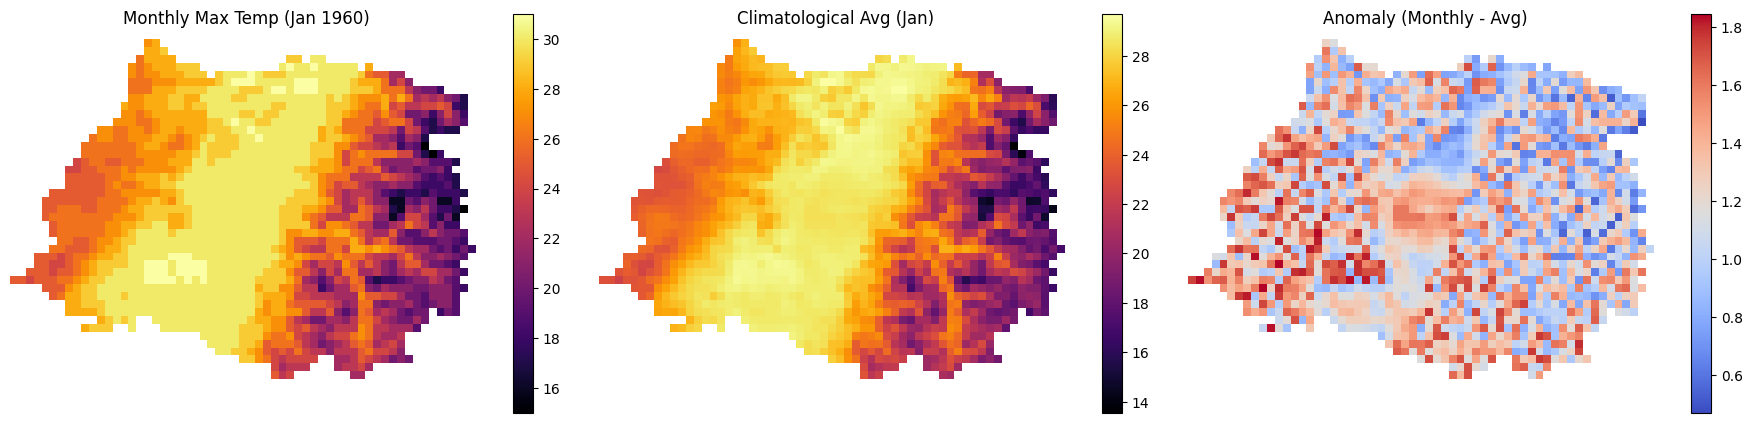

In [10]:


# Example month: January 1960
example_filename = "wc2.1_2.5m_tmax_1960-01.tif"
month_folder_path = "capas/clima/WorldClim_Maule/max_temp_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/max_temp_avg"
anomaly_folder_path = "capas/clima/WorldClim_Maule/max_temp_anomaly"

# Construct full paths
month_fp = os.path.join(month_folder_path, example_filename)
avg_fp = os.path.join(avg_folder_path, "wc2.1_2.5m_tmax_01.tif")
anomaly_fp = os.path.join(anomaly_folder_path, f"anomaly_{example_filename}")

# Read rasters
with rasterio.open(month_fp) as src_month:
    month_data = src_month.read(1)
    month_nodata = src_month.nodata

with rasterio.open(avg_fp) as src_avg:
    avg_data = src_avg.read(1)

with rasterio.open(anomaly_fp) as src_anom:
    anom_data = src_anom.read(1)

# Mask nodata
month_data = np.where(month_data == month_nodata, np.nan, month_data)
avg_data = np.where(avg_data == src_avg.nodata, np.nan, avg_data)
anom_data = np.where(anom_data == src_anom.nodata, np.nan, anom_data)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ["Monthly Max Temp (Jan 1960)", "Climatological Avg (Jan)", "Anomaly (Monthly - Avg)"]
data = [month_data, avg_data, anom_data]
cmaps = ['inferno', 'inferno', 'coolwarm']

for ax, dat, title, cmap in zip(axes, data, titles, cmaps):
    im = ax.imshow(dat, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.7)

plt.tight_layout()
plt.show()


In [13]:

### Min Temperature Anomaly Calculation

# Paths
month_folder_path = "capas/clima/WorldClim_Maule/min_temp_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/min_temp_avg"
output_folder = "capas/clima/WorldClim_Maule/min_temp_anomaly"
os.makedirs(output_folder, exist_ok=True)

# Regex pattern to extract YYYY-MM
pattern = re.compile(r"tmin_(\d{4})-(\d{2})\.tif")

for filename in os.listdir(month_folder_path):
    match = pattern.search(filename)
    if not match:
        print(f"Skipping file (unexpected format): {filename}")
        continue

    year, month = match.groups()

    # Build file paths
    monthly_file = os.path.join(month_folder_path, filename)
    avg_file = os.path.join(avg_folder_path, f"wc2.1_2.5m_tmin_{month}.tif")
    output_file = os.path.join(output_folder, f"anomaly_{filename}")

    if not os.path.exists(avg_file):
        print(f"Average file missing for month {month}: {avg_file}")
        continue

    with rasterio.open(monthly_file) as src_month, rasterio.open(avg_file) as src_avg:
        month_data = src_month.read(1)
        avg_data = src_avg.read(1)

        nodata = src_month.nodata
        mask = (month_data == nodata) | (avg_data == src_avg.nodata)

        anomaly = month_data.astype(float) - avg_data.astype(float)
        anomaly[mask] = nodata if nodata is not None else -9999

        profile = src_month.profile
        profile.update(dtype=rasterio.float32)

        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(anomaly.astype(rasterio.float32), 1)

print("Anomaly calculation complete.")


Skipping file (unexpected format): .DS_Store
Anomaly calculation complete.


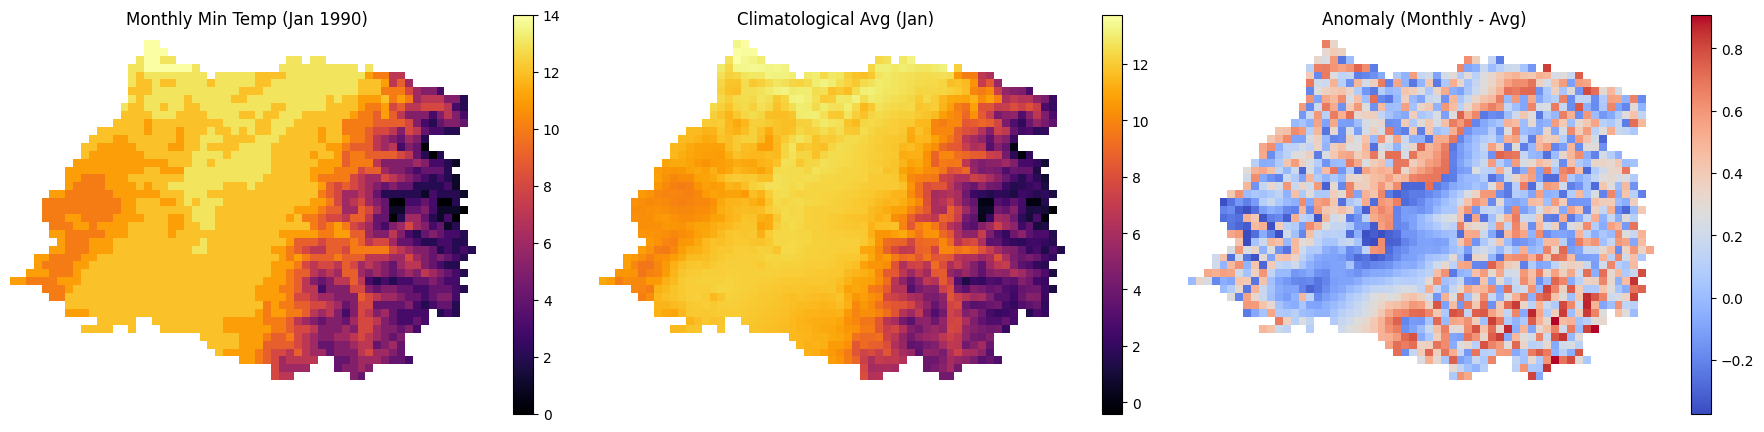

In [14]:


# Example month: January 1990
example_filename = "wc2.1_2.5m_tmin_1990-01.tif"
month_folder_path = "capas/clima/WorldClim_Maule/min_temp_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/min_temp_avg"
anomaly_folder_path = "capas/clima/WorldClim_Maule/min_temp_anomaly"

# Construct full paths
month_fp = os.path.join(month_folder_path, example_filename)
avg_fp = os.path.join(avg_folder_path, "wc2.1_2.5m_tmin_01.tif")
anomaly_fp = os.path.join(anomaly_folder_path, f"anomaly_{example_filename}")

# Read rasters
with rasterio.open(month_fp) as src_month:
    month_data = src_month.read(1)
    month_nodata = src_month.nodata

with rasterio.open(avg_fp) as src_avg:
    avg_data = src_avg.read(1)

with rasterio.open(anomaly_fp) as src_anom:
    anom_data = src_anom.read(1)

# Mask nodata
month_data = np.where(month_data == month_nodata, np.nan, month_data)
avg_data = np.where(avg_data == src_avg.nodata, np.nan, avg_data)
anom_data = np.where(anom_data == src_anom.nodata, np.nan, anom_data)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ["Monthly Min Temp (Jan 1990)", "Climatological Avg (Jan)", "Anomaly (Monthly - Avg)"]
data = [month_data, avg_data, anom_data]
cmaps = ['inferno', 'inferno', 'coolwarm']

for ax, dat, title, cmap in zip(axes, data, titles, cmaps):
    im = ax.imshow(dat, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.7)

plt.tight_layout()
plt.show()


In [16]:
### Precipitation Anomaly Calculation


# Paths
month_folder_path = "capas/clima/WorldClim_Maule/precipitation_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/precipitation_avg"
output_folder = "capas/clima/WorldClim_Maule/precipitation_anomaly"
os.makedirs(output_folder, exist_ok=True)

# Regex pattern to extract YYYY-MM
pattern = re.compile(r"prec_(\d{4})-(\d{2})\.tif")

for filename in os.listdir(month_folder_path):
    match = pattern.search(filename)
    if not match:
        print(f"Skipping file (unexpected format): {filename}")
        continue

    year, month = match.groups()

    # Build file paths
    monthly_file = os.path.join(month_folder_path, filename)
    avg_file = os.path.join(avg_folder_path, f"wc2.1_2.5m_prec_{month}.tif")
    output_file = os.path.join(output_folder, f"anomaly_{filename}")

    if not os.path.exists(avg_file):
        print(f"Average file missing for month {month}: {avg_file}")
        continue

    with rasterio.open(monthly_file) as src_month, rasterio.open(avg_file) as src_avg:
        month_data = src_month.read(1)
        avg_data = src_avg.read(1)

        nodata = src_month.nodata
        mask = (month_data == nodata) | (avg_data == src_avg.nodata)

        anomaly = month_data.astype(float) - avg_data.astype(float)
        anomaly[mask] = nodata if nodata is not None else -9999

        profile = src_month.profile
        profile.update(dtype=rasterio.float32)

        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(anomaly.astype(rasterio.float32), 1)

print("Anomaly calculation complete.")


Skipping file (unexpected format): .DS_Store
Anomaly calculation complete.


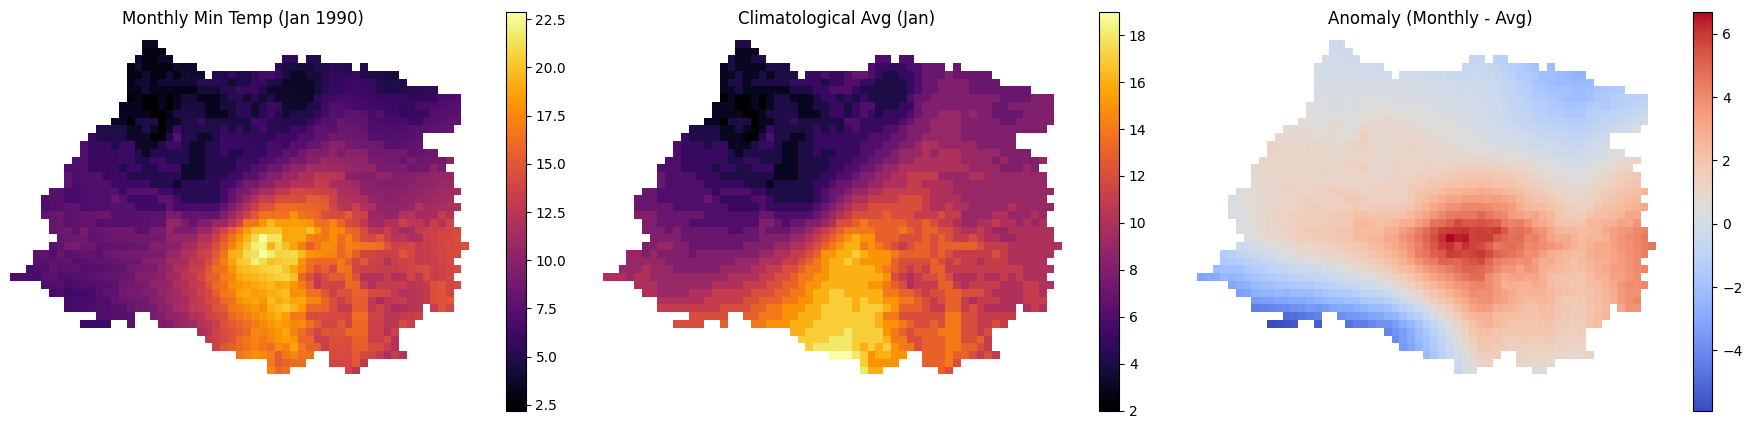

In [17]:


# Example month: January 1990
example_filename = "wc2.1_2.5m_prec_1990-01.tif"
month_folder_path = "capas/clima/WorldClim_Maule/precipitation_monthly"
avg_folder_path = "capas/clima/WorldClim_Maule/precipitation_avg"
anomaly_folder_path = "capas/clima/WorldClim_Maule/precipitation_anomaly"

# Construct full paths
month_fp = os.path.join(month_folder_path, example_filename)
avg_fp = os.path.join(avg_folder_path, "wc2.1_2.5m_prec_01.tif")
anomaly_fp = os.path.join(anomaly_folder_path, f"anomaly_{example_filename}")

# Read rasters
with rasterio.open(month_fp) as src_month:
    month_data = src_month.read(1)
    month_nodata = src_month.nodata

with rasterio.open(avg_fp) as src_avg:
    avg_data = src_avg.read(1)

with rasterio.open(anomaly_fp) as src_anom:
    anom_data = src_anom.read(1)

# Mask nodata
month_data = np.where(month_data == month_nodata, np.nan, month_data)
avg_data = np.where(avg_data == src_avg.nodata, np.nan, avg_data)
anom_data = np.where(anom_data == src_anom.nodata, np.nan, anom_data)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ["Monthly Precipitation (Jan 1990)", "Climatological Avg (Jan)", "Anomaly (Monthly - Avg)"]
data = [month_data, avg_data, anom_data]
cmaps = ['inferno', 'inferno', 'coolwarm']

for ax, dat, title, cmap in zip(axes, data, titles, cmaps):
    im = ax.imshow(dat, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.7)

plt.tight_layout()
plt.show()
